In [1]:
# Obviously, import needed packages
# Hint: this time, you'll also need Seaborn!
import urllib.request # module for downloading data from URLs
import seaborn as sb
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

##  Time to pratice some basics in Pandas using cute data about penguins :)
#### (1) Download (from rfd.atmos.uiuc.edu/Atms517/week7/penguins_size.csv'), using Python, the needed file
- yes, that link is correct
- a simplified version of a traditional data science dataset
- https://github.com/allisonhorst/palmerpenguins/blob/master/README.md  if you're in the mood for cute diagrams of penguins and their features...people are so creative! :)

In [10]:
import urllib.request
url = 'http://rfd.atmos.uiuc.edu/Atms517/week7/penguins_size.csv'
filename = 'penguins_size.csv'
urllib.request.urlretrieve(url,filename)

('penguins_size.csv', <http.client.HTTPMessage at 0x7fdc3837eee0>)

#### (2) Read in 'penguins_size.csv' using Pandas 

In [31]:
import pandas as pd
import chardet
f = open('penguins_size.csv', 'rb').read()
result = chardet.detect(f)
encode = result['encoding']
index = ['species', 'island', 'culmen_length_mm',  'culmen_depth_mm',  'flipper_length_mm', 'body_mass_g', 'sex']
tdata = pd.read_csv('penguins_size.csv', engine='python', encoding=encode, usecols=index)

#### (3) Print the first four and last four rows of this file (separately) using a specific method you learned in your lessons, to get a feel for your dataset.

In [32]:
print(tdata.head(4))
print(tdata.tail(4))

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
    species island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
148  Adelie  Dream              36.0             17.8              195.0   
149  Adelie  Dream              37.8             18.1              193.0   
150  Adelie  Dream              36.0             17.1              187.0   
151  Adelie  Dream              41.5             18.5              201.0   

     body_mass_g     sex  
148       3450.0  FEMALE  
149       3750.0    MALE  
150       3700.0  FEMA

#### (4) In one line of code, access only the species, body_mass_g, and sex columns and save to a new variable. Print out this new variable!
- there is more than one way to do this
- feel free to show multiple ways if you'd like

In [36]:
subset = tdata[['species', 'body_mass_g', 'sex']]
print(subset)

    species  body_mass_g     sex
0    Adelie       3750.0    MALE
1    Adelie       3800.0  FEMALE
2    Adelie       3250.0  FEMALE
3    Adelie          NaN     NaN
4    Adelie       3450.0  FEMALE
..      ...          ...     ...
147  Adelie       3475.0  FEMALE
148  Adelie       3450.0  FEMALE
149  Adelie       3750.0    MALE
150  Adelie       3700.0  FEMALE
151  Adelie       4000.0    MALE

[152 rows x 3 columns]


#### (5)  Culmen length and depth are unfamiliar animal characteristics to many of us.  Rename culmen_length_mm to beak_length_mm, and culmen_depth_mm to beak_depth_mm. 

In [40]:
tdata = tdata.rename(columns={'culmen_length_mm':'beak_length_mm', 'culmen_depth_mm':'beak_depth_mm'})
tdata.columns

Index(['species', 'island', 'beak_length_mm', 'beak_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

#### (6) Count the # of NaNs in each column.  Which column has the most?

In [43]:
print(tdata.isna().sum())
print('The sex column has the most, with 6.')

species              0
island               0
beak_length_mm       1
beak_depth_mm        1
flipper_length_mm    1
body_mass_g          1
sex                  6
dtype: int64
The sex column has the most, with 6.


#### (7) Drop any rows that have at least one NaN, and then confirm that you have removed all NaNs

In [45]:
tdata = tdata.dropna()
print(tdata.isna().sum())

species              0
island               0
beak_length_mm       0
beak_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


#### (8) For each numerical column, which you can think of as variables, each a characteristic of penguin, what is the maximum value? The minimum value?


In [57]:
tdata.max(axis=0)
print('''Max values:\n
    beak_length_mm            46.0
    beak_depth_mm             21.5
    flipper_length_mm        210.0
    body_mass_g             4775.0''')
tdata.min(axis=0)
print('''Min values:\n
    beak_length_mm         32.1
    beak_depth_mm          15.5
    flipper_length_mm     172.0
    body_mass_g          2850.0''')

Max values:

    beak_length_mm            46.0
    beak_depth_mm             21.5
    flipper_length_mm        210.0
    body_mass_g             4775.0
Min values:

    beak_length_mm         32.1
    beak_depth_mm          15.5
    flipper_length_mm     172.0
    body_mass_g          2850.0


#### (9) Create a box-and-whisker plot (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html), using Pandas built-in plotting functionality, of a penguin characteristic of your choice.  

    species     island  beak_length_mm  beak_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
147  Adelie      Dream            36.6           18.4              184.0   
148  Adelie      Dream            36.0           17.8              195.0   
149  Adelie      Dream            37.8           18.1              193.0   
150  Adelie      Dream            36.0           17.1              187.0   
151  Adelie      Dream            41.5           18.5              201.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2     

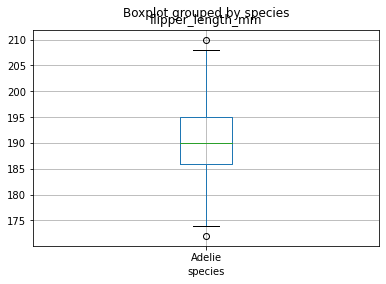

In [58]:
tdata.boxplot(column='flipper_length_mm', by='species')
print(tdata)

#### (10)  Describe the distribution of this characteristic, based on the box-and-whisker plot you created